In [8]:
import scipy.signal as signal
import matplotlib.pyplot as plt
import numpy as np
import pywt
import numpy.fft as fft
import warnings
warnings.filterwarnings('ignore')

# first, we constuct some sample signals

def get_signal1():
    fs = 100
    L = 600 * 3
    l = [i for i in range(L)]
    l = np.array(l)

    S1 = np.cos(np.pi * l / fs)
    S2 = np.cos(2 * np.pi * l / fs)
    S3 = np.cos(4 * np.pi * l / fs)
    S4 = np.cos(6 * np.pi * l / fs)
    S5 = np.cos(8 * np.pi * l / fs)
    S6 = np.cos(10 * np.pi * l / fs)

    S = S1 + S2 + S3  # +S4 +S5+S6
    t = np.array(range(len(S)))
    return S


def get_signal2():
    fs = 100
    L = 600 * 4
    l = [i for i in range(L)]
    l = np.array(l)

    S1 = np.cos(np.pi * l / fs + 20)
    S2 = np.cos(2 * np.pi * l / fs + 45)
    S3 = np.cos(4 * np.pi * l / fs + 70)
    S4 = np.cos(6 * np.pi * l / fs)
    S5 = np.cos(8 * np.pi * l / fs)
    S6 = np.cos(10 * np.pi * l / fs)

    S = S1 + S2 + S3  #+S4 +S5+S6
    return S

S1 = get_signal1()
S2 = get_signal2()


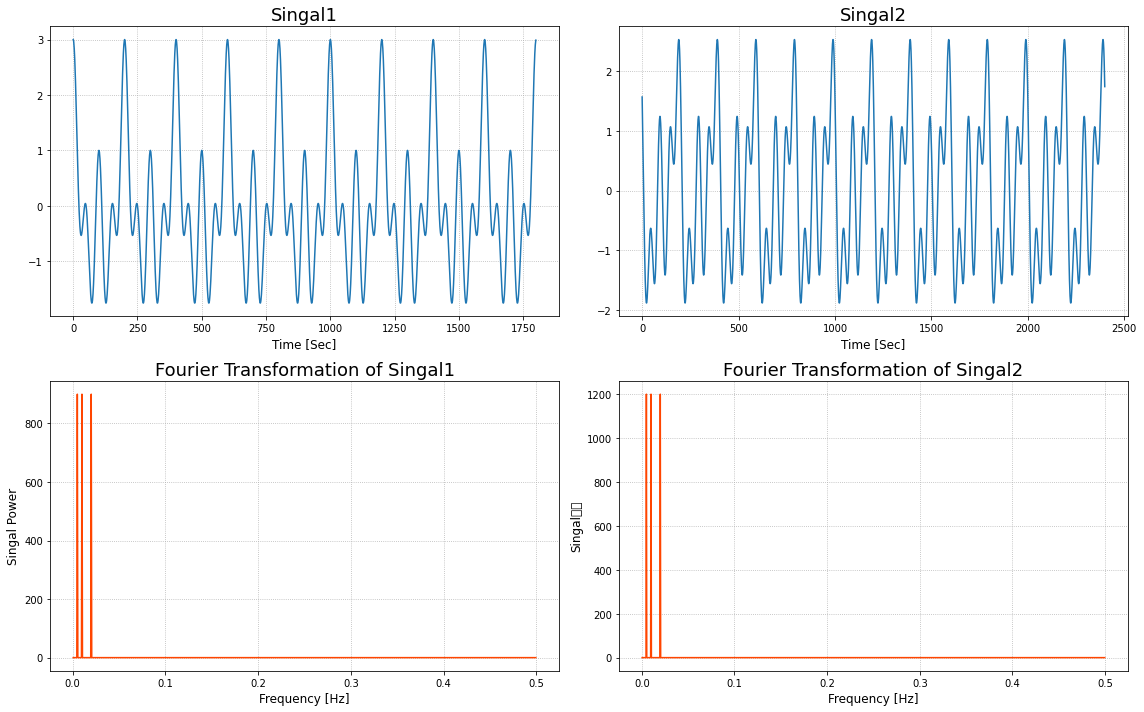

In [9]:
# plot the original singal and Fourier Transformation
# FT can not distinguish these two signal
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
ax1 = axes[0, 0]
ax1.grid(linestyle=':')
ax1.plot(range(len(S1)), S1, label='S')
ax1.set_title("Singal1", fontsize=18)
ax1.set_xlabel("Time [Sec]", fontsize=12)

ax2 = axes[0, 1]
ax2.grid(linestyle=':')
ax2.plot(range(len(S2)), S2, label='S')
ax2.set_title("Singal2", fontsize=18)
ax2.set_xlabel("Time [Sec]", fontsize=12)

ax3 = axes[1, 0]
complex_array = fft.fft(S1)
freqs = fft.fftfreq((len(S1)), 1)
pows = np.abs(complex_array)
ax3.grid(linestyle=':')
ax3.plot(freqs[freqs > 0],
            pows[freqs > 0],
            c='orangered',
            label='Frequency')
ax3.set_title("Fourier Transformation of Singal1", fontsize=18)
ax3.set_xlabel("Frequency [Hz]", fontsize=12)
ax3.set_ylabel("Singal Power", fontsize=12)

ax4 = axes[1, 1]
complex_array = fft.fft(S2)
freqs = fft.fftfreq((len(S2)), 1)
pows = np.abs(complex_array)
ax4.grid(linestyle=':')
ax4.plot(freqs[freqs > 0],
            pows[freqs > 0],
            c='orangered',
            label='Frequency')
ax4.set_title("Fourier Transformation of Singal2", fontsize=18)
ax4.set_xlabel("Frequency [Hz]", fontsize=12)
ax4.set_ylabel("Singal能量", fontsize=12)

plt.tight_layout()

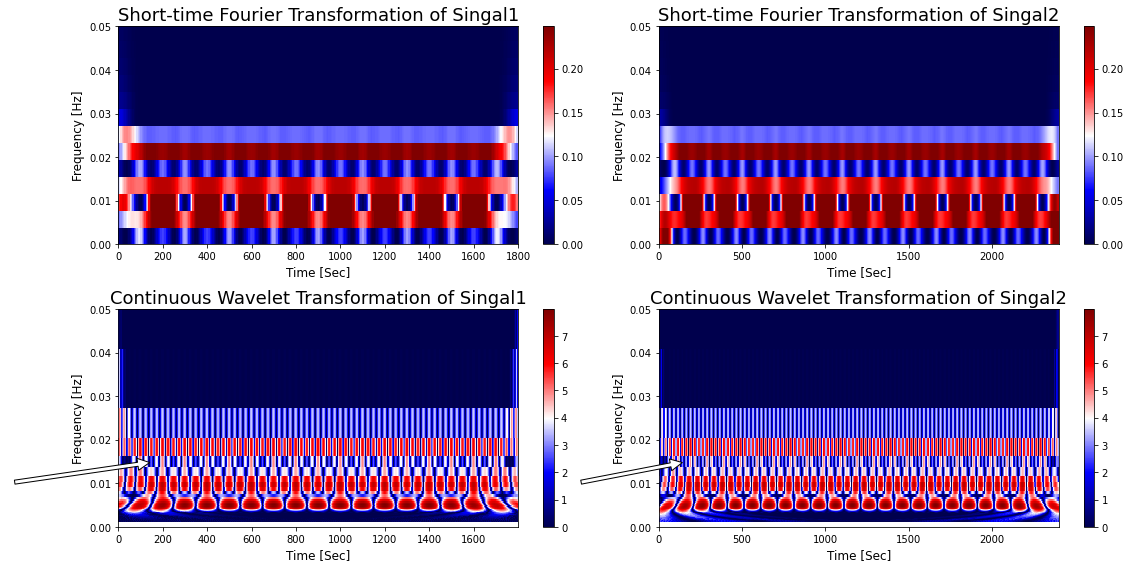

In [28]:
# plot the Short-time Fourier Transformation & Continuous Wavelet Transformatio
# CWT has higher resolution
fig = plt.figure(figsize=(16, 8))
ax1 = plt.subplot(221, ylim=(0, 0.05))
f, t, power = signal.stft(S1, noverlap=250)
power = abs(power)
cmap = plt.cm.seismic
cc = []
c1 = []
roof = np.percentile(power, 99)
for i in range(len(power)):
    power1 = power[i]
    c1 = [np.min((roof, x)) for x in power1]
    cc.append(c1)
power = np.array(cc)
power = (abs(power))**2
plt.pcolormesh(t, f, power, cmap=cmap)
plt.colorbar()
ax1.set_title("Short-time Fourier Transformation of Singal1", fontsize=18)
plt.ylabel('Frequency [Hz]', fontsize=12)
plt.xlabel('Time [Sec]', fontsize=12)

ax2 = plt.subplot(222, ylim=(0, 0.05))
f, t, power = signal.stft(S2, noverlap=250)
power = abs(power)
cmap = plt.cm.seismic
cc = []
c1 = []
roof = np.percentile(power, 99)
for i in range(len(power)):
    power1 = power[i]
    c1 = [np.min((roof, x)) for x in power1]
    cc.append(c1)
power = np.array(cc)
power = (abs(power))**2
plt.pcolormesh(t, f, power, cmap=cmap)
plt.colorbar()
ax2.set_title("Short-time Fourier Transformation of Singal2", fontsize=18)
plt.ylabel('Frequency [Hz]', fontsize=12)
plt.xlabel('Time [Sec]', fontsize=12)

ax3 = plt.subplot(223, ylim=(0, 0.05))
ax3.annotate("",
            xy=(175, 0.015), 
            xytext=(-500, 0.01),
            arrowprops=dict(facecolor='white',shrink=0.05)
            )
max_scale = 64
cmap = plt.cm.seismic
steps = 10
scales = (range(steps, (max_scale + 1) * steps, steps))
cmap = plt.cm.seismic
[coefficients, f] = pywt.cwt(S1, scales, 'morl')
power = (abs(coefficients))**2
cc = []
c1 = []
roof = np.percentile(power, 100)
for i in range(len(power)):
    power1 = power[i]
    c1 = [np.min((roof, x)) + 1 for x in power1]
    cc.append(c1)

power = np.array(cc)
power = np.log2(cc)

plt.pcolormesh((range(power.shape[1])), f, power, cmap=cmap)
plt.colorbar()
plt.title('Continuous Wavelet Transformation of Singal1', fontsize=18)
plt.ylabel('Frequency [Hz]', fontsize=12)
plt.xlabel('Time [Sec]', fontsize=12)

ax4 = plt.subplot(224, ylim=(0, 0.05))
ax4.annotate("",
            xy=(175, 0.015), 
            xytext=(-500, 0.01),
            arrowprops=dict(facecolor='white',shrink=0.05)
            )
max_scale = 64
cmap = plt.cm.seismic
steps = 10
scales = (range(steps, (max_scale + 1) * steps, steps))
cmap = plt.cm.seismic
[coefficients, f] = pywt.cwt(S2, scales, 'morl')
power = (abs(coefficients))**2
cc = []
c1 = []
roof = np.percentile(power, 100)
for i in range(len(power)):
    power1 = power[i]
    c1 = [np.min((roof, x)) + 1 for x in power1]
    cc.append(c1)

power = np.array(cc)
power = np.log2(cc)

plt.pcolormesh((range(power.shape[1])), f, power, cmap=cmap)
plt.colorbar()
plt.title('Continuous Wavelet Transformation of Singal2', fontsize=18)
plt.ylabel('Frequency [Hz]', fontsize=12)
plt.xlabel('Time [Sec]', fontsize=12)

plt.tight_layout()